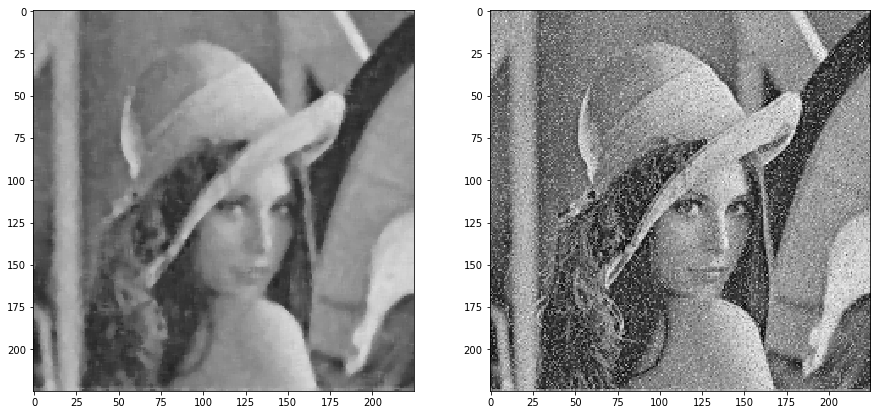

In [1]:
#Task:Filter Lena from salt and pepper
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np
import scipy.ndimage as spimg
import math


imbyc = img.imread('./bycicle.png')
imlen = img.imread('./lena.jpg')
imfru = img.imread('./unnamed.png')
imbook = img.imread('./book.png')
fig = plt.figure(figsize=(15,10))
ffimx = spimg.median_filter(imlen,size = 5)
plt.subplot(121)
plt.imshow(ffimx)
plt.subplot(122)
plt.imshow(imlen)
plt.show()

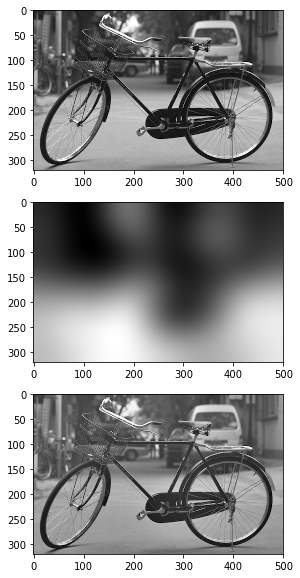

In [4]:
#Task: Substract from the original image its filtered copy

fig = plt.figure(figsize=(15,10))
imbyc_gauss = spimg.gaussian_filter(imbyc, 40)
imbyc_sharpened = (imbyc-imbyc_gauss) + imbyc
plt.subplot(311)
plt.imshow(imbyc, cmap='gray')
plt.subplot(312)
plt.imshow(imbyc_gauss, cmap='gray')
plt.subplot(313)
plt.imshow(imbyc_sharpened, cmap='gray')
plt.show()

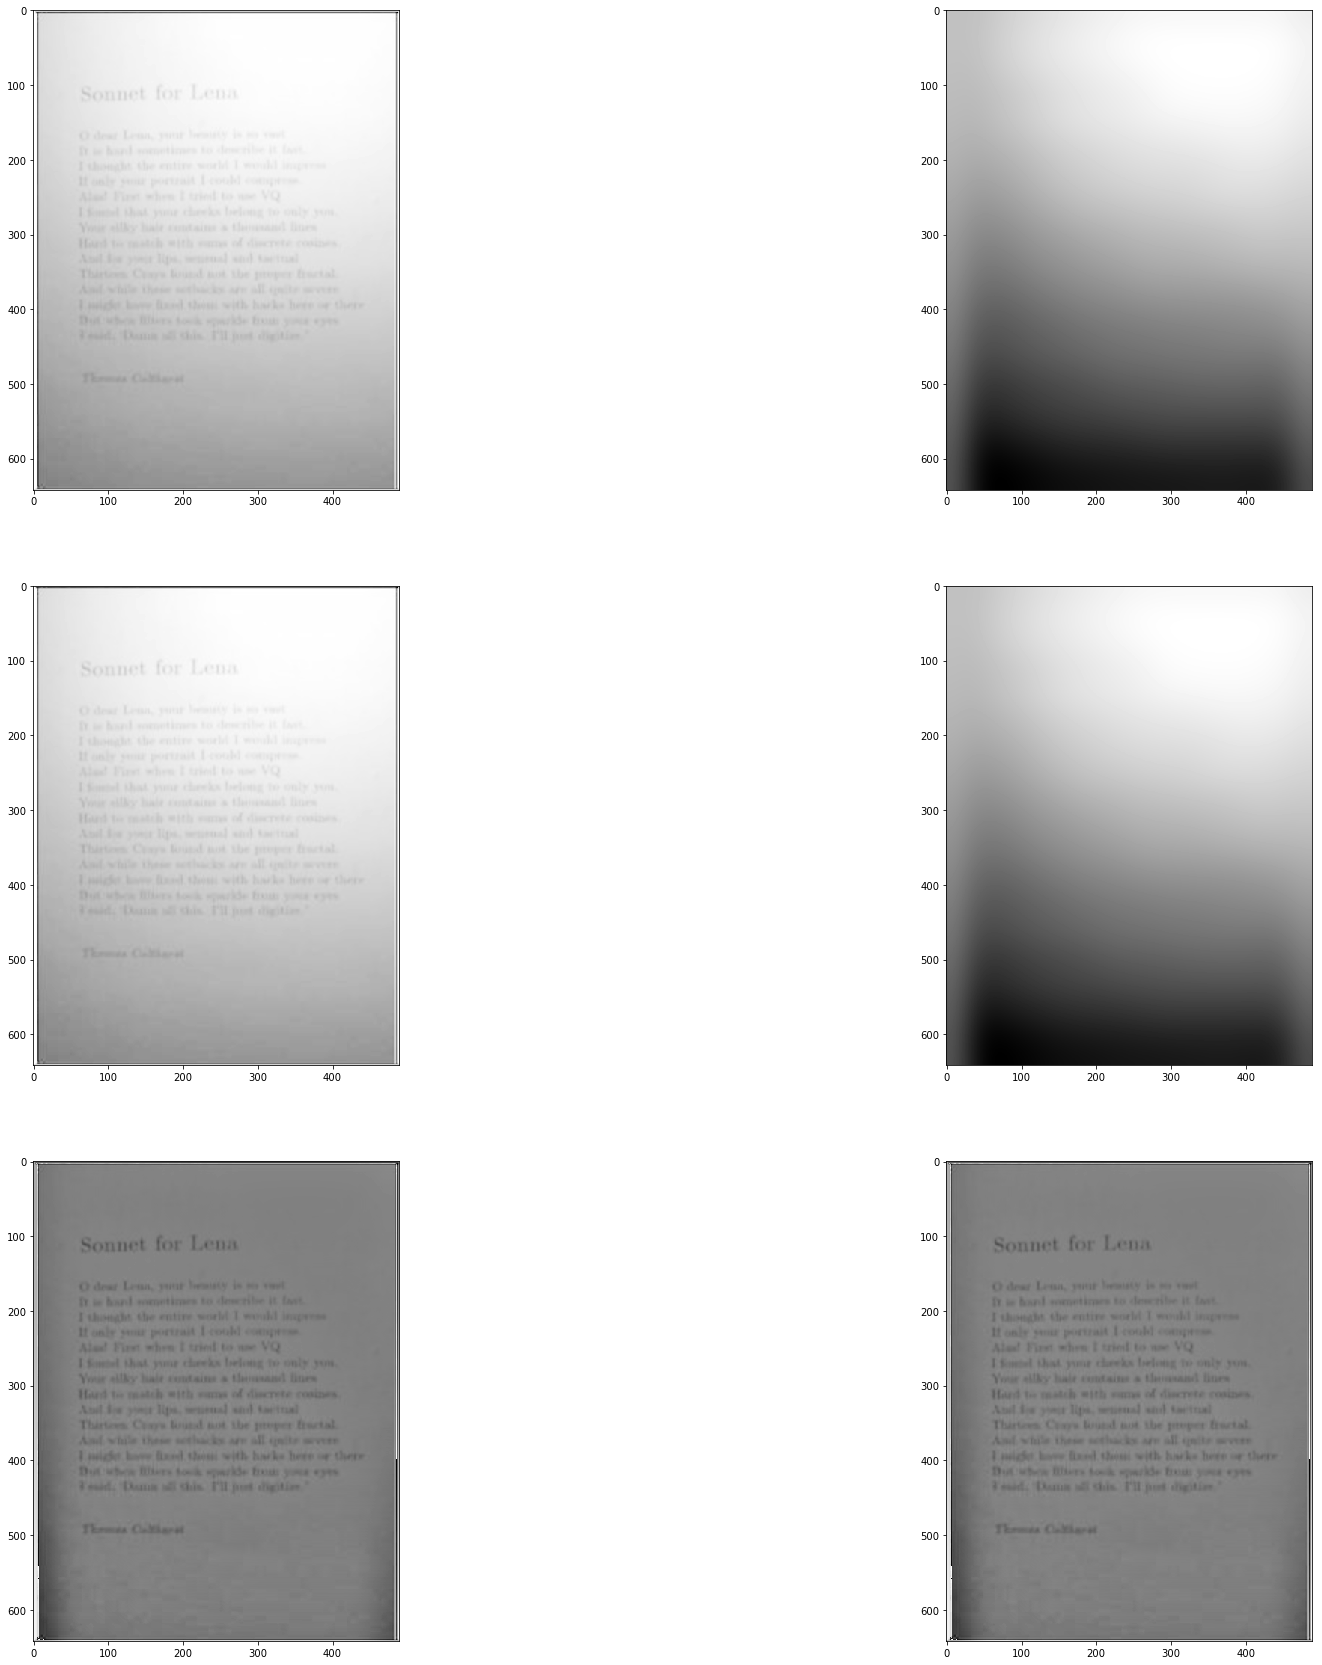

In [5]:
#Task: Make intensity correction by R(x, y, sigma) = log[I(x, y)] — log[I(x, y)G(x, y, sigma)] ,where 
#G - gaussian, sigma - coef of blurring, - convolution remapping of image from (-1,1) to (0,255) with I = 255*I + 127

fig = plt.figure(figsize=(30,30))
imbook = img.imread('./book.png')
r, g, b = imbook[:,:,0], imbook[:,:,1], imbook[:,:,2]
imbook = 0.2989 * r + 0.5870 * g + 0.1140 * b
imbook_g = spimg.gaussian_filter(imbook,25, order=0, output=None, mode='reflect', cval=0.0, truncate=4.0)
imbook_log = imbook
imbook_glog = imbook_g
for i in range(0, 642):
    for j in range(0, 489):
            imbook_log[i,j] = math.log(imbook_log[i,j])
            imbook_glog[i,j] = math.log(imbook_glog[i,j])
imbook_f = imbook_log - imbook_glog
imbook_e = imbook_f
mini = np.min(imbook_f)
maxi = np.max(imbook_f)
middle = (maxi+mini)/2
for i in range(0, 642):
    for j in range(0, 489):
            if imbook_e[i,j] >= middle:
                imbook_e[i,j] = imbook_e[i,j] + maxi
            if imbook_e[i,j] < middle:
                imbook_e[i,j] = imbook_e[i,j] - mini
plt.subplot(321)
plt.imshow(imbook, cmap = 'gray')
plt.subplot(322)
plt.imshow(imbook_g,cmap = 'gray')
plt.subplot(323)
plt.imshow(imbook_log, cmap = 'gray')
plt.subplot(324)
plt.imshow(imbook_glog, cmap = 'gray')
plt.subplot(325)
plt.imshow(imbook_f, cmap = 'gray')
plt.subplot(326)
plt.imshow(imbook_e, cmap = 'gray')
plt.show()